In [1]:
from pathlib import Path
import sys, os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [2]:
def get_log_df(log_file, stride=1):
    with open(log_file, 'r') as f:
        lines = [eval(i) for i in f.readlines()]
        
    return pd.DataFrame(lines[::stride])

In [3]:
dfs = {}
# for sae_date in range(250417,250419):
for sae_date in [250413, 250417, 250418]:
    dfs[sae_date] = get_log_df(f'/share/vault/Users/ch3849/esm_sae/model/{sae_date}/training_log_representative.json', stride=40)
legend = [250413, 250417, 250418]

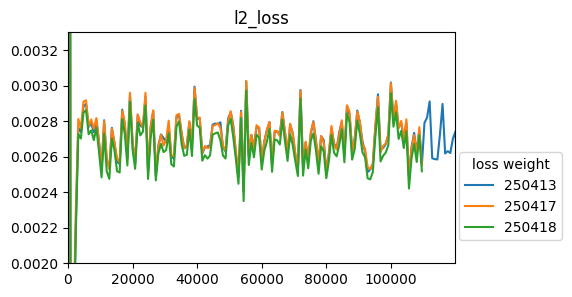

In [4]:
xtick_stride = 25
col = 'l2_loss'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    plt.plot(dfs[sae_date][col], alpha=1)
plt.plot([0,dfs[sae_date].index[-1]], [0.011]*2, c='black')
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
# plt.plot([0,dfs[sae_date].index[-1]], [4,4], c='black')
plt.title(col)
# plt.title(f'{col} human')
plt.ylim([0.002,0.0033])
plt.xlim([0, 150])
plt.legend(legend, title='loss weight', loc=[1.01,0.1])
plt.show()

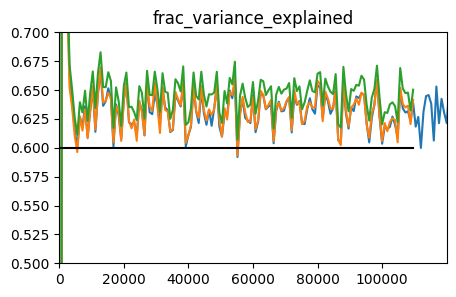

In [6]:
col = 'frac_variance_explained'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    plt.plot(dfs[sae_date][col])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.plot([0,dfs[sae_date].index[-1]], [0.6]*2, c='black')
plt.title(col)
# plt.title(f'{col} human')
plt.ylim([0.5,0.7])
plt.xlim([0, 150])
# plt.legend(['Tied', 'No tied'], title='dict size *8')
# plt.legend(legend, title='model')
plt.show()

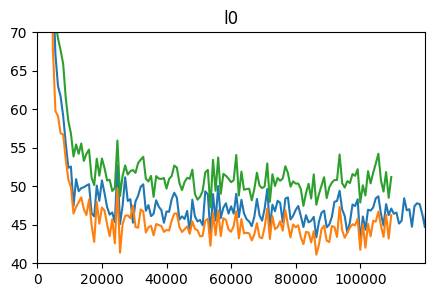

In [8]:
col = 'l0'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    # plt.plot(np.log10(dfs[sae_date][col]))
    plt.plot(dfs[sae_date][col])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.title(col)
# plt.title(f'{col} human')

plt.ylim([40,70])
plt.xlim([0, 150])
# plt.yticks([1,2,3],[10,100,1000])
# plt.legend(legend, title='smooth loss\nweight', loc=[1.01,0.1])

plt.show()

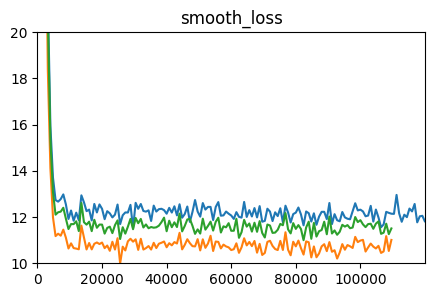

In [10]:
col = 'smooth_loss'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    # plt.plot(np.log10(dfs[sae_date][col]))
    plt.plot(dfs[sae_date][col])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.title(col)
# plt.title(f'{col} human')

plt.ylim([10,20])
plt.xlim([0, 150])
# plt.yticks([1,2,3],[10,100,1000])
# plt.legend(legend, title='model')

plt.show()

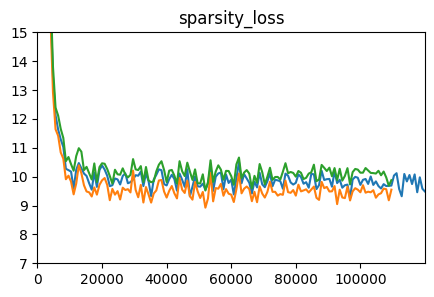

In [11]:
col = 'sparsity_loss'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    # plt.plot(np.log10(dfs[sae_date][col]))
    plt.plot(dfs[sae_date][col])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.title(col)
# plt.title(f'{col} human')

plt.ylim([7,15])
plt.xlim([0, 150])
# plt.yticks([1,2,3],[10,100,1000])
# plt.legend(legend, title='model')

plt.show()

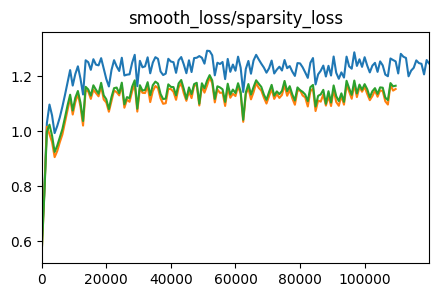

In [12]:
plt.figure(figsize=[5,3])
for sae_date in dfs:
    plt.plot(dfs[sae_date]['smooth_loss'] / dfs[sae_date]['sparsity_loss'])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.title('smooth_loss/sparsity_loss')
plt.xlim([0,150])
plt.show()

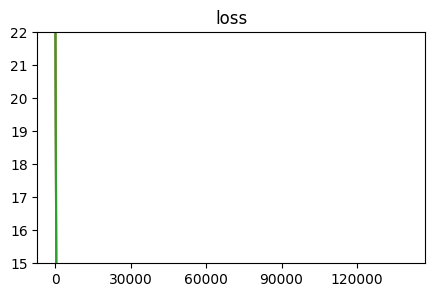

In [12]:
col = 'loss'
plt.figure(figsize=[5,3])
for sae_date in dfs:
    # plt.plot(np.log10(dfs[sae_date][col]))
    plt.plot(dfs[sae_date][col])
plt.xticks(dfs[sae_date].index[::xtick_stride], dfs[sae_date]['step'][::xtick_stride])
plt.title(col)
# plt.title(f'{col} human')

plt.ylim([15,22])
# plt.yticks([1,2,3],[10,100,1000])
# plt.legend(legend, title='model')

plt.show()

In [23]:
w = np.array([[1,2,3],[1,1.4,2],[1,0.5,1]])
w1 = w - w.mean(axis=-1, keepdims=True)
cov = np.dot(w1, w1.T)
eval, evec = np.linalg.eig(cov)

In [151]:
import numpy as np

# Original data
w = np.array([[1, 2, 3],
              [1, 1.4, 2],
              ]).T

# Step 1: Center the data (subtract the mean)
w_mean = w.mean(axis=0, keepdims=True)
w1 = w - w_mean

# Step 2: Compute the covariance matrix
cov = np.dot(w1.T, w1)

In [153]:
cov

array([[2.        , 1.        ],
       [1.        , 0.50666667]])

In [154]:
# Step 3: Compute eigenvalues and eigenvectors
eval, evec = np.linalg.eig(cov)
# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eval)[::-1]
eval = eval[sorted_indices]
evec = evec[:, sorted_indices]

In [155]:
eval

array([2.50133618, 0.00533048])

In [156]:
evec

array([[ 0.89394889, -0.44816892],
       [ 0.44816892,  0.89394889]])

In [114]:
np.dot(cov, evec)

array([[ 2.23602073e+00, -1.45364855e-02,  3.33066907e-16],
       [ 1.12121186e+00,  2.65741266e-02,  1.88723725e-16],
       [ 1.60074898e-02,  1.69211847e-01, -1.34051087e-17]])

In [123]:
evec[:,0]

array([0.89389634, 0.44822804, 0.00639933])

In [125]:
evec[:,0].reshape(-1,1)

array([[0.89389634],
       [0.44822804],
       [0.00639933]])

In [130]:
(eval*evec[:,0]).reshape(-1,1)

array([[2.23602073e+00],
       [7.70510944e-02],
       [6.37364011e-19]])

In [147]:
np.dot(evec, evec.T)

array([[ 1.00000000e+00,  9.30912986e-17,  1.47510068e-17],
       [ 9.30912986e-17,  1.00000000e+00, -3.26406745e-17],
       [ 1.47510068e-17, -3.26406745e-17,  1.00000000e+00]])

In [150]:
evec

array([[ 0.89389634, -0.08456285, -0.44022545],
       [ 0.44822804,  0.15458922,  0.88045091],
       [ 0.00639933,  0.98435324, -0.17609018]])

In [149]:
eval

array([2.50143178e+00, 1.71901550e-01, 9.95985391e-17])

In [135]:
np.dot((eval*evec)[:,2].reshape(-1,1), evec[:,2].reshape(1,-1))

array([[ 1.93020425e-17, -3.86040849e-17,  7.72081698e-18],
       [-3.86040849e-17,  7.72081698e-17, -1.54416340e-17],
       [ 7.72081698e-18, -1.54416340e-17,  3.08832679e-18]])

In [148]:
np.dot(eval*evec, evec.T)

array([[2.00000000e+00, 1.00000000e+00, 1.04683794e-18],
       [1.00000000e+00, 5.06666667e-01, 3.33333333e-02],
       [4.27054334e-19, 3.33333333e-02, 1.66666667e-01]])

In [63]:
pc_projection

array([[-1.10200287, -0.03201498,  1.13401785],
       [ 0.17648009, -0.33842369,  0.1619436 ]])

In [144]:
evec[:,0]

array([0.89389634, 0.44822804, 0.00639933])

In [141]:
w1

array([[-1.        , -0.46666667,  0.16666667],
       [ 0.        , -0.06666667, -0.33333333],
       [ 1.        ,  0.53333333,  0.16666667]])

In [142]:
pc_projection = np.dot(evec[:,0], w1)

In [143]:
pc_projection

array([-8.87497013e-01, -4.43620520e-01,  6.39933092e-04])

In [ ]:
reconstructed_w = np.dot(evec_2, pc_projection) + w_mean

In [52]:
# Step 6: Project the centered data onto the first two PCs
pc_projection = np.dot(evec_2.T, w1)

# Step 7: Reconstruct the data using the first two PCs
reconstructed_w = np.dot(evec_2, pc_projection) + w_mean

# Display the reconstructed data
print("Original data (w):")
print(w)

print("\nReconstructed data using first two PCs:")
print(reconstructed_w)

Original data (w):
[[1.  2.  3. ]
 [1.  1.4 2. ]
 [1.  0.5 1. ]]

Reconstructed data using first two PCs:
[[1.  2.  3. ]
 [1.  1.4 2. ]
 [1.  0.5 1. ]]


In [45]:
evec

array([[ 0.89389634, -0.44022545, -0.08456285],
       [ 0.44822804,  0.88045091,  0.15458922],
       [ 0.00639933, -0.17609018,  0.98435324]])

In [51]:
np.dot(evec*eval, evec.T)

array([[ 2.00000000e+00,  1.00000000e+00,  2.64914855e-19],
       [ 1.00000000e+00,  5.06666667e-01,  3.33333333e-02],
       [-3.54868746e-19,  3.33333333e-02,  1.66666667e-01]])

In [12]:
cov = np.array([[1,0.9,0],[0.9,1,0],[0,0,1]])

In [13]:
cov

array([[1. , 0.9, 0. ],
       [0.9, 1. , 0. ],
       [0. , 0. , 1. ]])